In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from classy import *

Keras not installed
Version:  0.0.19


In [3]:
images=image.load_images('train_pieces')
summary(images)

[black]: 48 files found
[red]: 48 files found
[white]: 32 files found
Images
128 images of shape (29, 34, 3)
Target values given.
Target names: 'black', 'red', 'white'


In [4]:
data_train=image.images_to_patch_vectors(images,(1,1),grayscale=False,verbose=False)
data_train.vectors/=255
summary(data_train)

126208 vectors of length 3
Feature names: 'r0', 'g0', 'b0'
Target values given.
Target names: 'black', 'red', 'white'
Mean:  [0.57303629 0.49456938 0.4721105 ]
Median:  [0.69411765 0.40784314 0.4       ]
Stddev:  [0.20504378 0.21451377 0.20104832]


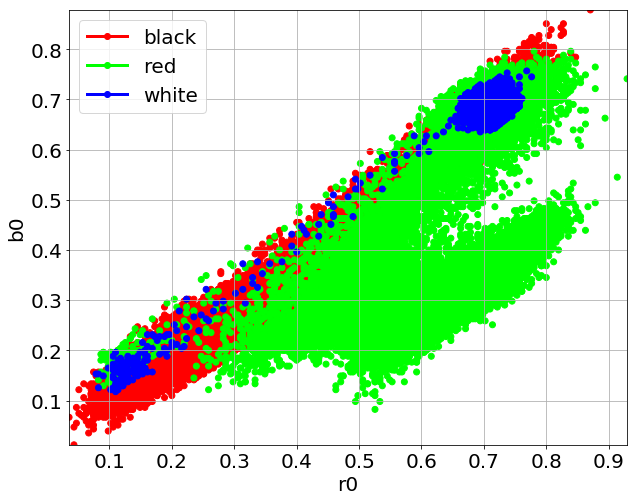

In [14]:
subset=extract_features(data_train,[0,2])
plot2D(subset,legend_location='upper left')

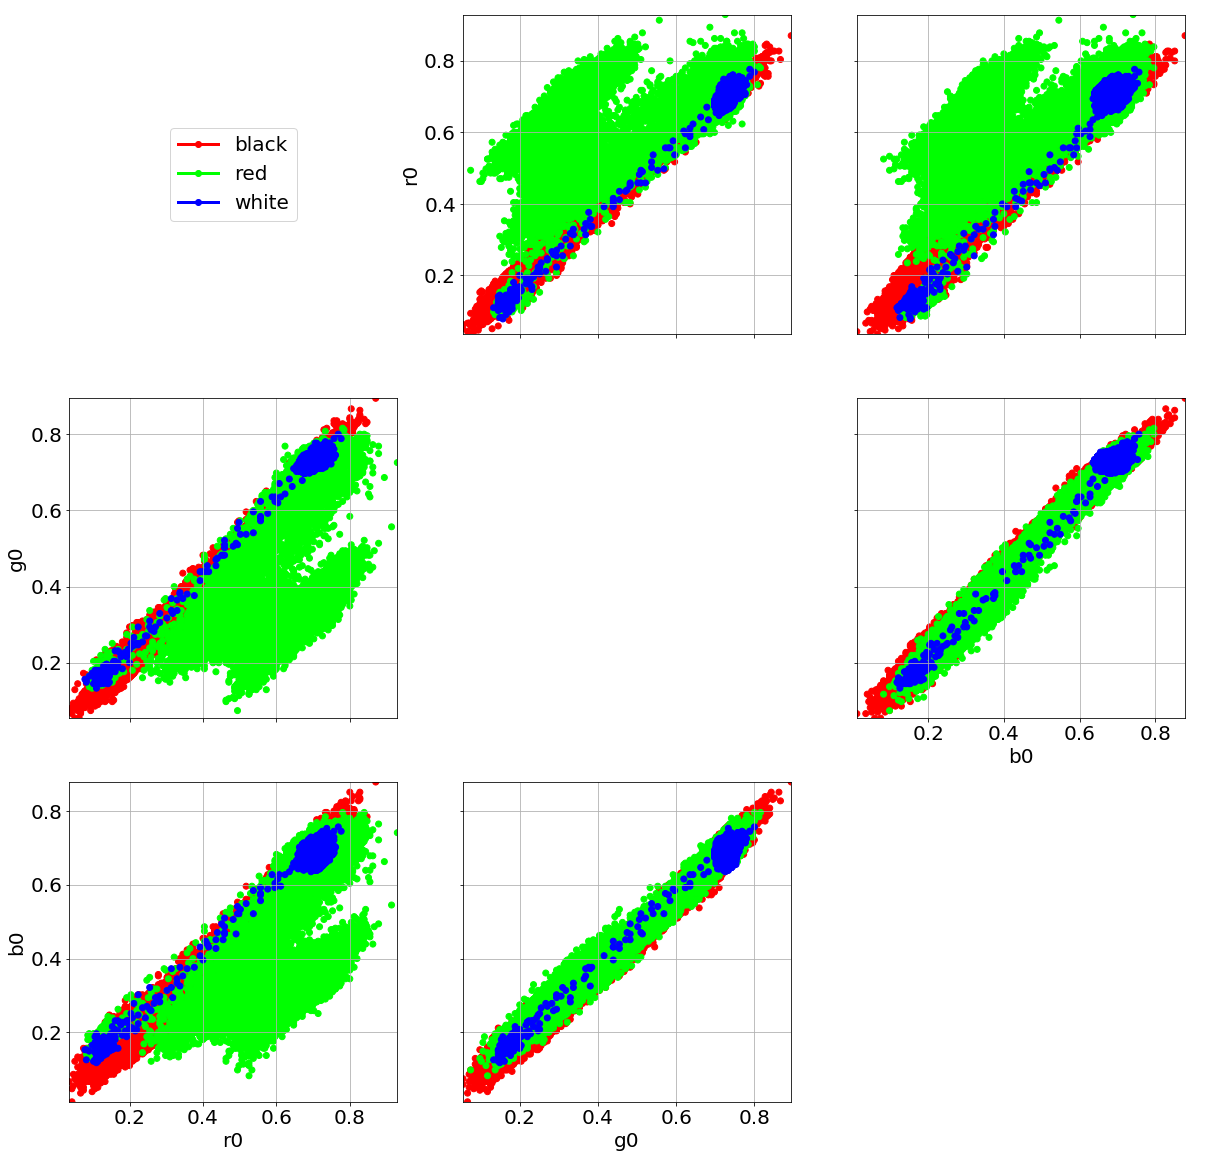

In [15]:
plot_feature_combinations(data_train)

### classification

In [5]:
images=image.load_images('train_pieces')
summary(images)

data_train=image.images_to_patch_vectors(images,(1,1),grayscale=False,verbose=False)
data_train.vectors/=255
summary(data_train)

[black]: 48 files found
[red]: 48 files found
[white]: 32 files found
Images
128 images of shape (29, 34, 3)
Target values given.
Target names: 'black', 'red', 'white'
126208 vectors of length 3
Feature names: 'r0', 'g0', 'b0'
Target values given.
Target names: 'black', 'red', 'white'
Mean:  [0.57303629 0.49456938 0.4721105 ]
Median:  [0.69411765 0.40784314 0.4       ]
Stddev:  [0.20504378 0.21451377 0.20104832]


In [6]:
images=image.load_images('test_pieces')
summary(images)

data_test=image.images_to_patch_vectors(images,(1,1),grayscale=False,verbose=False)
data_test.vectors/=255
summary(data_test)

[black]: 10 files found
[red]: 8 files found
[white]: 14 files found
Images
32 images of shape (29, 34, 3)
Target values given.
Target names: 'black', 'red', 'white'
31552 vectors of length 3
Feature names: 'r0', 'g0', 'b0'
Target values given.
Target names: 'black', 'red', 'white'
Mean:  [0.60250132 0.55586359 0.52811344]
Median:  [0.72156863 0.7254902  0.68235294]
Stddev:  [0.20859603 0.22205224 0.21132503]


In [7]:
C=NaiveBayes()

In [8]:
timeit(reset=True)
C.fit(data_train.vectors,data_train.targets)
print("Training time: ",timeit())

Time Reset
Training time:  0.02197575569152832 seconds 


In [9]:
print("On Test Set:",C.percent_correct(data_test.vectors,data_test.targets))

On Test Set: 81.64934077079108


In [10]:
C=kNearestNeighbor()

In [11]:
timeit(reset=True)
C.fit(data_train.vectors,data_train.targets)
print("Training time: ",timeit())

Time Reset
Training time:  0.14714789390563965 seconds 


In [12]:
print("On Test Set:",C.percent_correct(data_test.vectors,data_test.targets))

On Test Set: 61.6981490872211


## try a larger patch

In [13]:
images=image.load_images('train_pieces')
summary(images)

data_train=image.images_to_patch_vectors(images,(2,2),grayscale=False,verbose=False)
data_train.vectors/=255
summary(data_train)

[black]: 48 files found
[red]: 48 files found
[white]: 32 files found
Images
128 images of shape (29, 34, 3)
Target values given.
Target names: 'black', 'red', 'white'
118272 vectors of length 12
Feature names: 'r0', 'r1', 'r2', 'r3', 'g0', 'g1', 'g2', 'g3', 'b0', 'b1', 'b2', 'b3'
Target values given.
Target names: 'black', 'red', 'white'
Mean:  [0.56835596 0.4861955  0.46423532 0.57072952 0.48892805 0.46685228
 0.57149465 0.4921742  0.4697793  0.57387242 0.49488292 0.47237415]
Median:  [0.69411765 0.39215686 0.39215686 0.69411765 0.39607843 0.39215686
 0.69411765 0.40392157 0.39607843 0.69411765 0.40784314 0.4       ]
Stddev:  [0.20698245 0.21333389 0.19972666 0.20603464 0.21371383 0.20005854
 0.20518945 0.21391328 0.20039443 0.20419216 0.21420612 0.20065012]


In [14]:
images=image.load_images('test_pieces')
summary(images)

data_test=image.images_to_patch_vectors(images,(2,2),grayscale=False,verbose=False)
data_test.vectors/=255
summary(data_test)

[black]: 10 files found
[red]: 8 files found
[white]: 14 files found
Images
32 images of shape (29, 34, 3)
Target values given.
Target names: 'black', 'red', 'white'
29568 vectors of length 12
Feature names: 'r0', 'r1', 'r2', 'r3', 'g0', 'g1', 'g2', 'g3', 'b0', 'b1', 'b2', 'b3'
Target values given.
Target names: 'black', 'red', 'white'
Mean:  [0.59919282 0.55020717 0.522803   0.60035173 0.55091103 0.52353233
 0.60104777 0.55480236 0.5269645  0.60224726 0.55557678 0.52775205]
Median:  [0.72156863 0.72156863 0.67843137 0.72156863 0.7254902  0.67843137
 0.72156863 0.7254902  0.68235294 0.72156863 0.7254902  0.68235294]
Stddev:  [0.21060536 0.22322735 0.21235428 0.20982674 0.22291016 0.2121361
 0.2090459  0.22231474 0.21157733 0.20818922 0.22193926 0.21131232]


In [15]:
C=NaiveBayes()

In [16]:
timeit(reset=True)
C.fit(data_train.vectors,data_train.targets)
print("Training time: ",timeit())

Time Reset
Training time:  0.04222393035888672 seconds 


In [17]:
print("On Test Set:",C.percent_correct(data_test.vectors,data_test.targets))

On Test Set: 83.05938852813853


## How about the entire image?

In [3]:
images=image.load_images('train_pieces')
summary(images)

data_train=image.images_to_vectors(images)
data_train.vectors/=255
summary(data_train)

[black]: 48 files found
[red]: 48 files found
[white]: 32 files found
Images
128 images of shape (29, 34, 3)
Target values given.
Target names: 'black', 'red', 'white'
128 vectors of length 2958
Feature names: 'p0', 'p1', 'p2', 'p3', 'p4'  , ... ,  'p2953', 'p2954', 'p2955', 'p2956', 'p2957'  (2958 features)
Target values given.
Target names: 'black', 'red', 'white'
Mean:  [147.546875  131.875     126.453125  ... 177.5       176.6328125
 169.09375  ]
Median:  [177. 161. 157. ... 184. 188. 180.]
Stddev:  [53.09703078 56.59905587 54.49438896 ... 23.96449196 34.5983361
 32.94940191]
128 vectors of length 2958
Feature names: 'p0', 'p1', 'p2', 'p3', 'p4'  , ... ,  'p2953', 'p2954', 'p2955', 'p2956', 'p2957'  (2958 features)
Target values given.
Target names: 'black', 'red', 'white'
Mean:  [0.5786152  0.51715686 0.49589461 ... 0.69607843 0.6926777  0.66311275]
Median:  [0.69411765 0.63137255 0.61568627 ... 0.72156863 0.7372549  0.70588235]
Stddev:  [0.20822365 0.22195708 0.21370349 ... 0.093

In [4]:
images=image.load_images('test_pieces')
summary(images)

data_test=image.images_to_vectors(images)
data_test.vectors/=255
summary(data_test)

[black]: 10 files found
[red]: 8 files found
[white]: 14 files found
Images
32 images of shape (29, 34, 3)
Target values given.
Target names: 'black', 'red', 'white'
32 vectors of length 2958
Feature names: 'p0', 'p1', 'p2', 'p3', 'p4'  , ... ,  'p2953', 'p2954', 'p2955', 'p2956', 'p2957'  (2958 features)
Target values given.
Target names: 'black', 'red', 'white'
Mean:  [161.1875  151.78125 143.9375  ... 176.40625 178.96875 169.8125 ]
Median:  [184.  186.  173.  ... 185.5 188.  179.5]
Stddev:  [47.84443378 52.05509964 49.9630723  ... 29.51997139 32.05413816
 33.64840031]
32 vectors of length 2958
Feature names: 'p0', 'p1', 'p2', 'p3', 'p4'  , ... ,  'p2953', 'p2954', 'p2955', 'p2956', 'p2957'  (2958 features)
Target values given.
Target names: 'black', 'red', 'white'
Mean:  [0.63210784 0.59522059 0.56446078 ... 0.69178922 0.70183824 0.66593137]
Median:  [0.72156863 0.72941176 0.67843137 ... 0.72745098 0.7372549  0.70392157]
Stddev:  [0.18762523 0.20413765 0.19593362 ... 0.11576459 0.12

In [5]:
C=NaiveBayes()

In [6]:
timeit(reset=True)
C.fit(data_train.vectors,data_train.targets)
print("Training time: ",timeit())

Time Reset
Training time:  0.007032155990600586 seconds 


In [7]:
print("On Test Set:",C.percent_correct(data_test.vectors,data_test.targets))

On Test Set: 100.0


In [23]:
C.means.shape

(3, 2958)

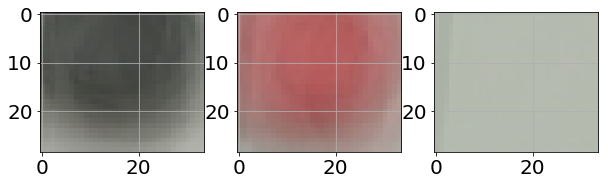

In [32]:
subplot(1,3,1)
im=image.vector_to_image(C.means[0],(29, 34, 3))

subplot(1,3,2)
im=image.vector_to_image(C.means[1],(29, 34, 3))

subplot(1,3,3)
im=image.vector_to_image(C.means[2],(29, 34, 3))


In [33]:
data_test.target_names

['black', 'red', 'white']

In [34]:
C=CSC()

In [35]:
timeit(reset=True)
C.fit(data_train.vectors,data_train.targets)
print("Training time: ",timeit())

Time Reset
Training time:  0.24983787536621094 seconds 


In [36]:
print("On Test Set:",C.percent_correct(data_test.vectors,data_test.targets))

On Test Set: 100.0
